# Saab Classifier
Classify your Saab (Categories: 900, 9000, 9-3, 9-5)

## Mount gdrive

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PROJEKT_BASE_PATH = Path('drive/My Drive/Projekte/saab-model-classifier')

In [48]:
PROJEKT_BASE_PATH.ls()

(#4) [Path('drive/My Drive/Projekte/saab-model-classifier/SaabModelClassifier.ipynb'),Path('drive/My Drive/Projekte/saab-model-classifier/image_urls'),Path('drive/My Drive/Projekte/saab-model-classifier/data'),Path('drive/My Drive/Projekte/saab-model-classifier/saab-model-classifier')]

In [0]:
#Run once per session
import os
!pip install -q feather-format kornia pyarrow wandb nbdev fastprogress fastai2 fastcore --upgrade 
!pip install torch==1.3.1
!pip install torchvision==0.4.2
!pip install Pillow==6.2.1 --upgrade
os._exit(00)

     |████████████████████████████████| 143kB 9.5MB/s 
     |████████████████████████████████| 59.2MB 47kB/s 
     |████████████████████████████████| 1.4MB 43.7MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 174kB 40.3MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 460kB 76.2MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 2.1MB 9.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2


In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

## Download Images

_Images are downloaded into the root folder of drive to prevent local synchronisation!_

In [0]:
folders = ['Saab_9000', 'Saab_900', 'Saab_93', 'Saab_95']
files = ['saab9000.csv', 'saab900.csv', 'saab93.csv', 'saab95.csv']
classes = ['Saab 9000', 'Saab 900', 'Saab 9-3', 'Saab 9-5']

In [0]:
path = Path('data')/Path('saab-model-classifier')
path.mkdir(parents=True, exist_ok=True)

In [8]:
# Download Images
for i, n in enumerate(classes):
  print(n)
  path_f = PROJEKT_BASE_PATH/Path('image_urls')/Path(files[i])
  download_images(path/n, path_f, max_pics=700)

Saab 9000


Saab 900


Saab 9-3


Saab 9-5


In [52]:
(PROJEKT_BASE_PATH/Path('image_urls')).ls()

(#4) [Path('drive/My Drive/Projekte/saab-model-classifier/image_urls/saab93.csv'),Path('drive/My Drive/Projekte/saab-model-classifier/image_urls/saab95.csv'),Path('drive/My Drive/Projekte/saab-model-classifier/image_urls/saab9000.csv'),Path('drive/My Drive/Projekte/saab-model-classifier/image_urls/saab900.csv')]

In [9]:
# And check they are all good. If not, we will delete them
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

Saab 9000


Saab 900


Saab 9-3


Saab 9-5


In [0]:
??L

In [0]:
for im in imgs:
  im.unlink()

In [11]:
# Let's double check
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

Saab 9000


Saab 900


Saab 9-3


Saab 9-5


In [58]:
path.ls()

(#4) [Path('data/saab-model-classifier/Saab 9-5'),Path('data/saab-model-classifier/Saab 900'),Path('data/saab-model-classifier/Saab 9-3'),Path('data/saab-model-classifier/Saab 9000')]

## View Data

In [0]:
# Create Datablock
cars = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [0]:
dls = cars.dataloaders(path,  bs=32)

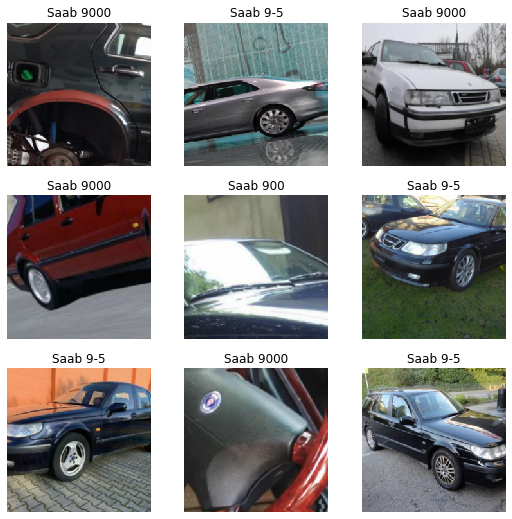

In [14]:
# Good! Let's take a look at some of our pictures then.
dls.show_batch(max_n=9)

In [15]:
dls.vocab

(#4) ['Saab 9-3','Saab 9-5','Saab 900','Saab 9000']

# Train the model

In [16]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 291MB/s]


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.079530,1.158185,0.469758,00:38
1,1.741418,1.156652,0.465726,00:38
2,1.527077,1.012889,0.423387,00:38
3,1.400679,1.010458,0.415323,00:38


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


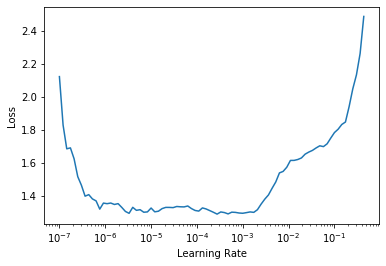

In [21]:
learn.lr_find()

In [23]:
learn.fit_one_cycle(10, lr_max=slice(1e-7, 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,1.328808,1.010485,0.409274,00:39
1,1.305958,1.032059,0.425403,00:39
2,1.311821,1.017573,0.419355,00:39
3,1.340303,1.005401,0.409274,00:39
4,1.315891,1.010392,0.405242,00:40
5,1.292644,0.999958,0.407258,00:39
6,1.285184,0.997413,0.415323,00:39
7,1.316187,1.006793,0.407258,00:40
8,1.308459,1.010988,0.403226,00:39
9,1.302315,1.010641,0.415323,00:39


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency e

In [0]:
learn.save('stage-2')

## Interpretation

In [25]:
learn.load('stage-2')

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

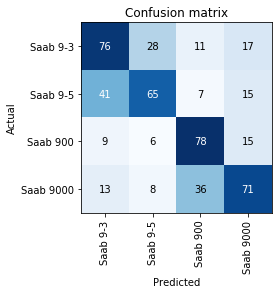

In [27]:
interp.plot_confusion_matrix()

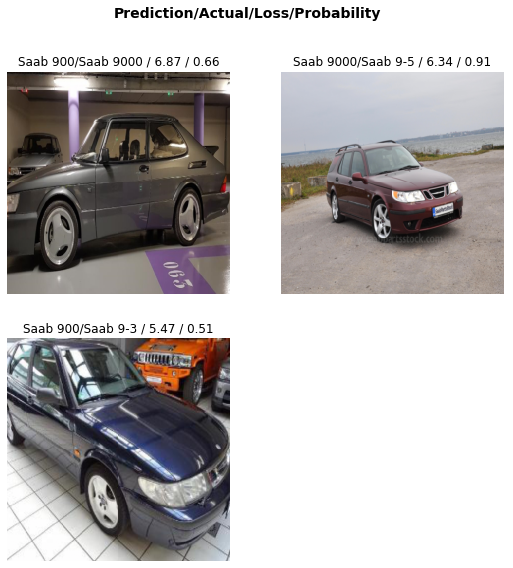

In [29]:
interp.plot_top_losses(3, figsize=(9,9))

In [30]:
!ls

data  drive  models  sample_data


In [0]:
!mv  drive/My\ Drive/Projekte/saab-model-classifier data/saab-model-classifier

In [38]:
!ls drive/My\ Drive/Projekte/

ls: cannot access 'drive/My Drive/Projekte/saab-model-classifier': No such file or directory
